In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score, cross_validate 

In [2]:
%config Completer.use_jedi = False

In [3]:
two_class_df = pd.read_csv('./2Classdata.csv')
print(f'Dataset have {two_class_df.shape[0]} rows and {two_class_df.shape[1]} columns' )

Dataset have 310 rows and 7 columns


In [4]:
two_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


We can see all the feature have float64 datatype

In [5]:
two_class_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
two_class_df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [7]:
TAR_COL = 'class'
FEATURE_COL = [col for col in two_class_df.columns if TAR_COL != col]

In [8]:
null_values_per_column = (two_class_df.isnull().sum() / two_class_df.shape[0]) * 100
null_values_per_column

pelvic_incidence            0.0
pelvic_tilt numeric         0.0
lumbar_lordosis_angle       0.0
sacral_slope                0.0
pelvic_radius               0.0
degree_spondylolisthesis    0.0
class                       0.0
dtype: float64

No null values observed

#### Q. Is there any duplicate rows in dataset?

In [9]:
two_class_df[two_class_df.duplicated()].shape[0]

0

No Duplicate rows in dataset

In [10]:
two_class_df[FEATURE_COL].describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


Let's encode the target column

In [11]:
label_encoder = LabelEncoder()
label_encoder.fit(two_class_df[TAR_COL])
two_class_df[TAR_COL] = label_encoder.transform(two_class_df[TAR_COL])
two_class_df.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
293,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759,1
292,34.756738,2.631740,29.504381,32.124998,127.139850,-0.460894,1
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,0
23,45.540790,13.069598,30.298321,32.471192,117.980830,-4.987130,0
181,64.624008,15.225303,67.632167,49.398705,90.298468,31.326411,0


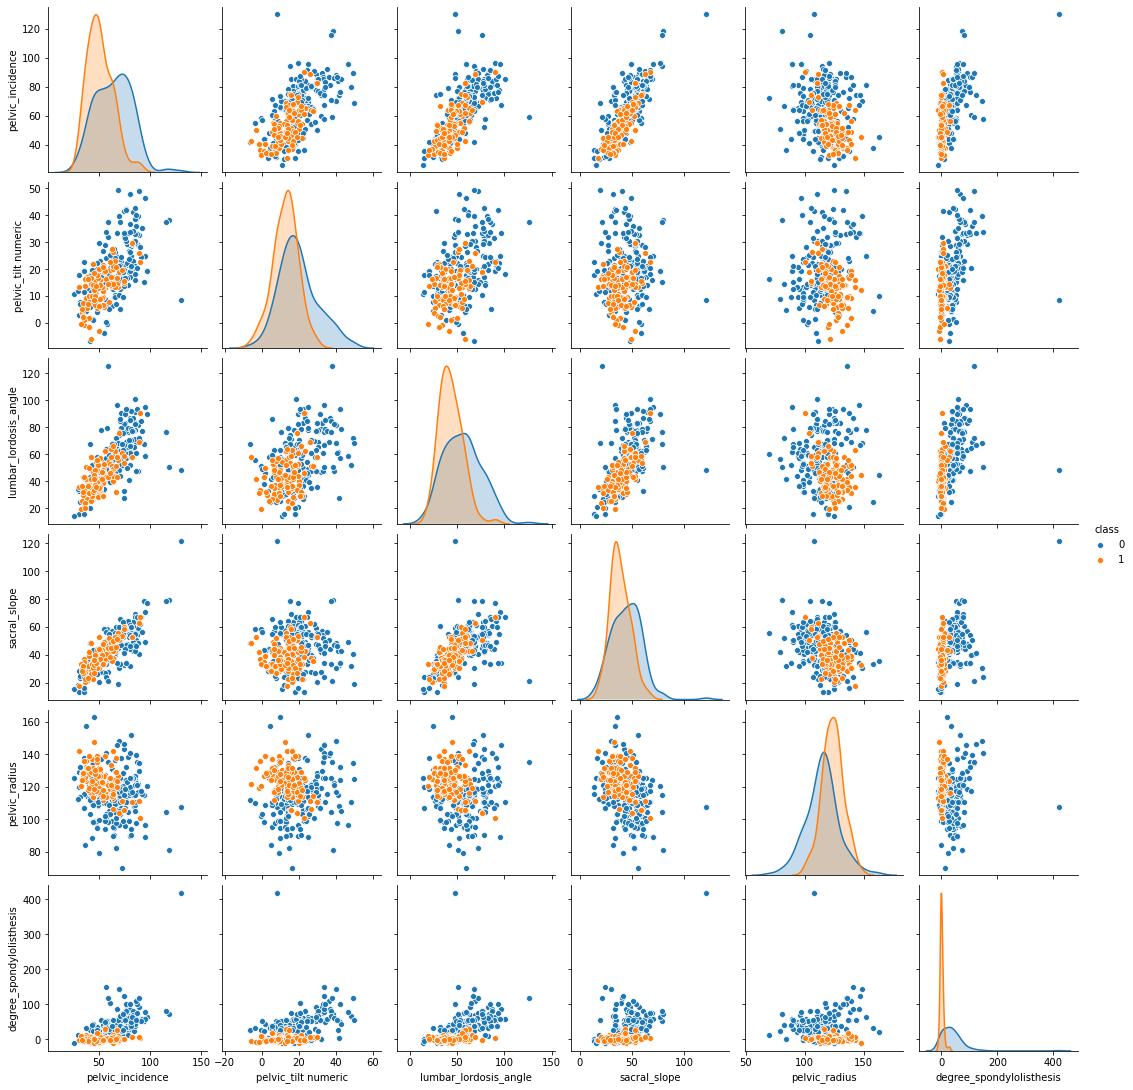

In [12]:
pairplot = sns.pairplot(two_class_df, hue=TAR_COL)

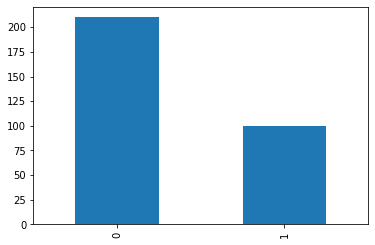

In [13]:
_ = two_class_df[TAR_COL].value_counts().plot(kind='bar')

In [90]:
X = two_class_df.values[:, :-1]
y = two_class_df.values[:, -1]

Let's try with default parameters

In [15]:
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.784 (0.058)


Let's try to find best K value

In [88]:
def hyper_parameter_check(X, y, multi_class=False):
    neighbors = np.arange(3, 50, 2)

    acc_scores = {}

    # Loop over different values of k
    for i, k in enumerate(neighbors):

        scaler = MinMaxScaler()
        model = KNeighborsClassifier(n_neighbors=k)
        pipeline = Pipeline(steps=[
            ('scaler_v', scaler), 
            ('model_1', model)
        ])
        if multi_class:
            scoring = [
                "f1_micro"
            ]
        else:
            scoring = [
                "f1",
                "accuracy"
            ]
        # evaluate the pipeline
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
        n_scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
        
        if not multi_class:
            acc_scores[k] = {
                "f1": np.mean(n_scores['test_f1']),
                'acccuracy': np.mean(n_scores['test_accuracy'])
            }
            print('n: %d -> Accuracy: %.3f (%.3f), F1: %.3f (%.3f)' % (k,
                                                                   np.mean(n_scores['test_accuracy']), 
                                                                   np.std(n_scores['test_accuracy']), 
                                                                    np.mean(n_scores['test_f1']), 
                                                                    np.std(n_scores['test_f1'])))
        else:
            acc_scores[k] = {
                "f1": np.mean(n_scores['test_f1_micro']),
            }
            print('n: %d -> F1: %.3f (%.3f)' % (k, 
                                                np.mean(n_scores['test_f1_micro']), 
                                                np.std(n_scores['test_f1_micro'])))

        # report pipeline performance
       
    return acc_scores

def top_2_scores(score_object):
    return sorted(score_object.items(), key = lambda x: x[1]['f1'], reverse=True)[:2]

In [91]:
scores = hyper_parameter_check(X, y)

n: 3 -> Accuracy: 0.778 (0.081), F1: 0.664 (0.117)
n: 5 -> Accuracy: 0.785 (0.070), F1: 0.661 (0.109)
n: 7 -> Accuracy: 0.785 (0.076), F1: 0.658 (0.123)
n: 9 -> Accuracy: 0.797 (0.071), F1: 0.677 (0.121)
n: 11 -> Accuracy: 0.805 (0.064), F1: 0.694 (0.106)
n: 13 -> Accuracy: 0.801 (0.070), F1: 0.691 (0.110)
n: 15 -> Accuracy: 0.800 (0.064), F1: 0.687 (0.102)
n: 17 -> Accuracy: 0.798 (0.060), F1: 0.689 (0.094)
n: 19 -> Accuracy: 0.811 (0.061), F1: 0.704 (0.094)
n: 21 -> Accuracy: 0.812 (0.059), F1: 0.704 (0.093)
n: 23 -> Accuracy: 0.815 (0.057), F1: 0.705 (0.095)
n: 25 -> Accuracy: 0.815 (0.056), F1: 0.703 (0.092)
n: 27 -> Accuracy: 0.815 (0.058), F1: 0.704 (0.098)
n: 29 -> Accuracy: 0.808 (0.057), F1: 0.692 (0.097)
n: 31 -> Accuracy: 0.808 (0.056), F1: 0.689 (0.098)
n: 33 -> Accuracy: 0.802 (0.057), F1: 0.682 (0.098)
n: 35 -> Accuracy: 0.802 (0.060), F1: 0.680 (0.105)
n: 37 -> Accuracy: 0.805 (0.065), F1: 0.686 (0.111)
n: 39 -> Accuracy: 0.804 (0.060), F1: 0.686 (0.101)
n: 41 -> Accurac

Let's get the top two k values (we have choosen the f1 as metrics because our data is not balanced one)

In [92]:
top_2_scores(scores)

[(23, {'f1': 0.7051597936171903, 'acccuracy': 0.8154838709677419}),
 (19, {'f1': 0.7043600949207086, 'acccuracy': 0.8109677419354838})]

#### Both k=23 and k=19 are best values and the K also close enough. We will choose k=19 as difference between the values is (F1 ~ 0.000799 and acc ~ 0.0045) very small and complexity of system will be less if we choose smaller k

## Let's take anther data for KNN

In [46]:
three_class_df = pd.read_csv('./3Classdata.csv')
print(f'Dataset have {three_class_df.shape[0]} rows and {three_class_df.shape[1]} columns' )

Dataset have 310 rows and 7 columns


In [47]:
three_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


We can see all the feature have float64 datatype

In [54]:
three_class_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [55]:
three_class_df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [56]:
TAR_COL = 'class'
FEATURE_COL = [col for col in three_class_df.columns if TAR_COL != col]

In [57]:
null_values_per_column = (three_class_df.isnull().sum() / three_class_df.shape[0]) * 100
null_values_per_column

pelvic_incidence            0.0
pelvic_tilt                 0.0
lumbar_lordosis_angle       0.0
sacral_slope                0.0
pelvic_radius               0.0
degree_spondylolisthesis    0.0
class                       0.0
dtype: float64

Let's encode the target column

In [58]:
label_encoder = LabelEncoder()
label_encoder.fit(three_class_df[TAR_COL])
three_class_df[TAR_COL] = label_encoder.transform(three_class_df[TAR_COL])
three_class_df.sample(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
54,41.171680,17.321206,33.469403,23.850474,116.377889,-9.569250,0
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,2
101,79.938570,18.774071,63.311835,61.164499,114.787107,38.538741,2
89,71.186811,23.896201,43.696665,47.290610,119.864938,27.283985,2
10,49.706610,13.040974,31.334500,36.665635,108.648265,-7.825986,0


No null values observed

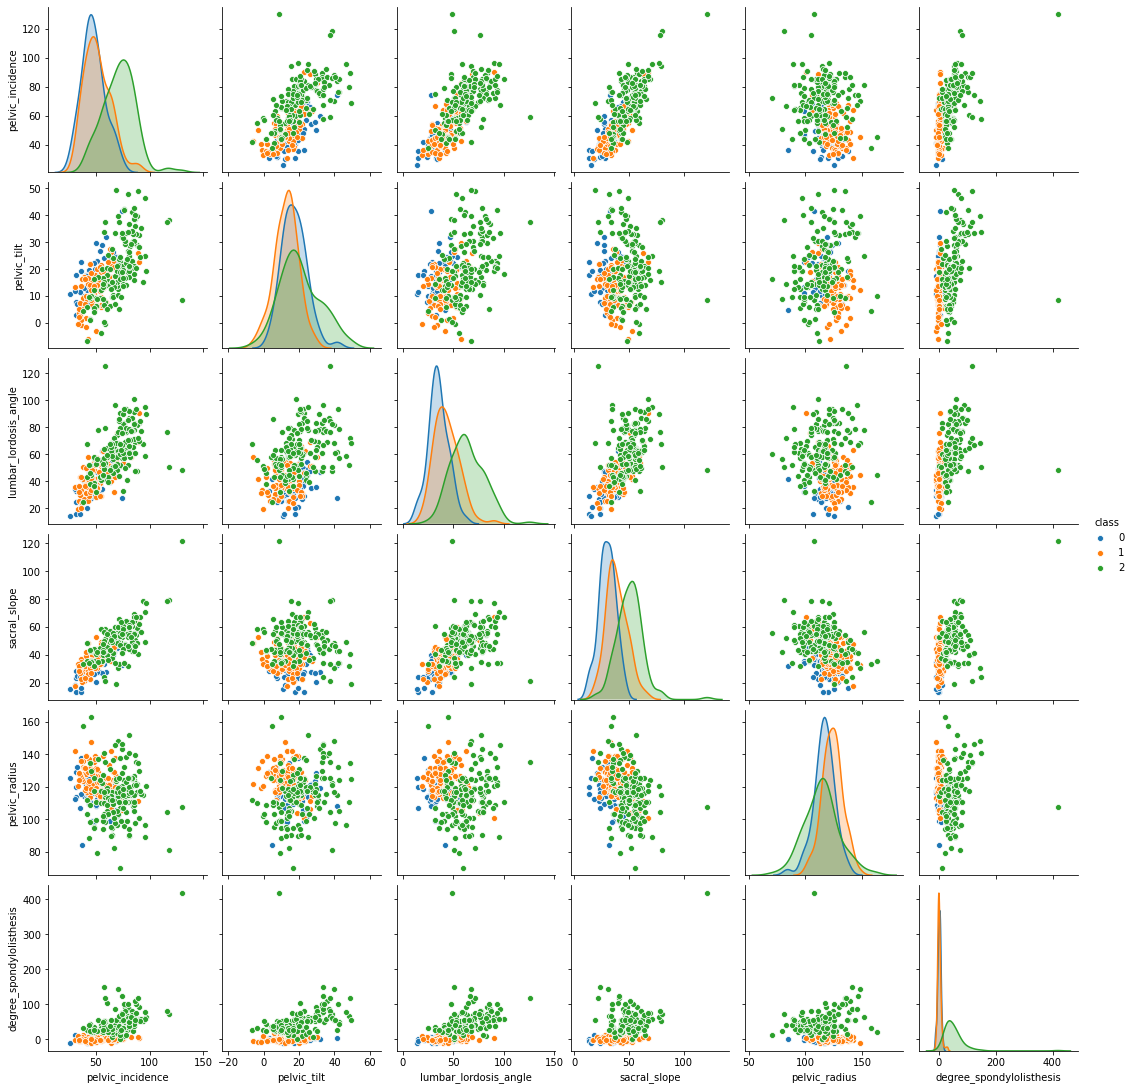

In [59]:
pairplot = sns.pairplot(three_class_df, hue=TAR_COL)

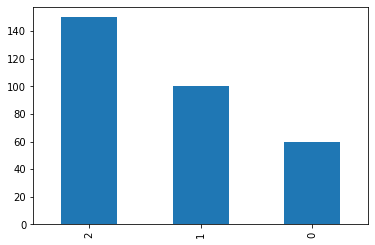

In [60]:
_ = three_class_df[TAR_COL].value_counts().plot(kind='bar')

In [93]:
X = three_class_df.values[:, :-1]
y = three_class_df.values[:, -1]

In [94]:
scores = hyper_parameter_check(X, y, True)

n: 3 -> F1: 0.737 (0.081)
n: 5 -> F1: 0.755 (0.079)
n: 7 -> F1: 0.754 (0.073)
n: 9 -> F1: 0.766 (0.071)
n: 11 -> F1: 0.785 (0.076)
n: 13 -> F1: 0.781 (0.079)
n: 15 -> F1: 0.783 (0.074)
n: 17 -> F1: 0.781 (0.074)
n: 19 -> F1: 0.777 (0.069)
n: 21 -> F1: 0.782 (0.068)
n: 23 -> F1: 0.788 (0.067)
n: 25 -> F1: 0.781 (0.067)
n: 27 -> F1: 0.775 (0.071)
n: 29 -> F1: 0.772 (0.073)
n: 31 -> F1: 0.770 (0.077)
n: 33 -> F1: 0.772 (0.072)
n: 35 -> F1: 0.769 (0.064)
n: 37 -> F1: 0.769 (0.070)
n: 39 -> F1: 0.773 (0.078)
n: 41 -> F1: 0.769 (0.075)
n: 43 -> F1: 0.763 (0.072)
n: 45 -> F1: 0.763 (0.071)
n: 47 -> F1: 0.757 (0.072)
n: 49 -> F1: 0.757 (0.070)


In [95]:
top_2_scores(scores)

[(23, {'f1': 0.7877419354838711}), (11, {'f1': 0.7845161290322581})]

#### Both k=23 and k=11 are best values and the K also close enough. We will choose k=11 as difference between the values is (F1 ~ .003 ) very small and complexity of system will be less if we choose smaller k